<a href="https://colab.research.google.com/github/owepper/BSC_DPDM2025/blob/main/Ch3_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Input data

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
flood = pd.read_csv('/content/drive/MyDrive/datamining/flooding database.csv')
flood.head()

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,dfo_cause,dfo_severity,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000
0,DFO_1586_From_20000218_to_20000301,1586,otsu,0,Australia,0,143.697800,-31.268059,2/18/00,3/1/00,...,Heavy rain,2.0,316.73,38.0,38.0,43,1,0,-5,NaN
1,DFO_1587_From_20000217_to_20000311,1587,otsu,0,Madagascar,0,47.295670,-15.782624,2/17/00,3/11/00,...,"Tropical Storm, Surge",1.0,228.50,4594.0,4594.0,6855,1,0,-2261,NaN
2,DFO_1595_From_20000405_to_20000425,1595,otsu,0,Romania,Hungary,22.415404,46.763746,4/5/00,4/25/00,...,"Snowmelt, Ice, Rain",2.0,89.10,3093.0,3093.0,4618,1,0,-1525,NaN
3,DFO_1614_From_20000711_to_20000810,1614,otsu,0,Thailand,Vietnam,105.063841,11.242567,7/11/00,8/10/00,...,Heavy rain,1.0,4322.47,544758.0,544758.0,658643,1,0,-113885,NaN
4,DFO_1627_From_20000830_to_20000910,1627,otsu,0,China,Russia,132.057679,43.773883,8/30/00,9/10/00,...,"Tropical Storm, Surge",1.0,740.33,785363.0,785363.0,766309,1,0,19054,1.0


#Data Cleaning

##Missing Data

###Check Missing Data

In [ ]:
flood.isnull().any()

In [ ]:
flood.isnull().sum()

###Drop Record ที่มี missing ออก

drop ถ้ามี missing

In [ ]:
flood.shape

In [ ]:
flood_drop1 = flood.dropna()
flood_drop1.shape

drop เฉพาะเกิด missing ในตัวแปรที่เราจะใช้
- dfo_country
- dfo_other_country
- dfo_began
- dfo_ended
- dfo_dead
- dfo_cause
- dfo_severity

In [ ]:
flood_drop2 = flood.dropna(subset=['dfo_country','dfo_other_country','dfo_began',
                                                    'dfo_ended','dfo_dead','dfo_cause','dfo_severity'])
flood_drop2.shape


In [ ]:
flood_drop2.head()

### เติม Dummy

In [ ]:
flood[flood.isnull()['dfo_other_country']]

In [ ]:
flood_filldummy = flood.fillna(value={'dfo_other_country':'Unknown'})

In [ ]:
flood_filldummy.isnull().sum()

### เติมด้วยค่ากลาง

In [ ]:
flood.groupby('dfo_cause').count()

In [ ]:
flood_fillmode = flood.fillna(value={'dfo_cause':'Heavy rain'})

In [ ]:
flood_fillmode.isnull().sum()

### เติมด้วยตัวแทนของกลุ่ม

In [ ]:
flood.groupby(['dfo_cause', 'dfo_severity']).count()

In [ ]:
flood_sever1 = flood[flood['dfo_severity']==1.0]
flood_sever15 = flood[flood['dfo_severity']==1.5]
flood_sever2 = flood[flood['dfo_severity']==2.0]

In [ ]:
flood_sever1 = flood_sever1.fillna({'dfo_cause':'Heavy rain'})
flood_sever15 = flood_sever15.fillna({'dfo_cause':'Heavy rain'})
flood_sever2 = flood_sever2.fillna({'dfo_cause':'Tropical Storm, Surge'})

In [ ]:
flood_fillgroup = pd.concat([flood_sever1,flood_sever15,flood_sever2])

In [ ]:
flood_fillgroup.isnull().sum()

## Noisy Data

###Binning

Explore data

In [ ]:
flood['gfd_area']

,gfd_area
0,316.73
1,228.50
2,89.10
3,4322.47
4,740.33
...,...
908,1866.91
909,2720.37
910,10019.87
911,6467.41


In [ ]:
from matplotlib import pyplot as plt

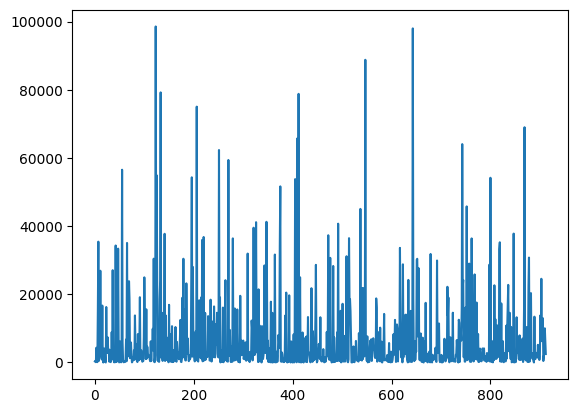

In [ ]:
plt.plot(flood['gfd_area'])

ใช้ histogram ดู Bin ที่เหมาะสม

(array([541., 126.,  61.,  35.,  38.,  26.,  12.,  13.,  10.,  12.,   9.,
          7.,   4.,   2.,   0.,   1.,   4.,   1.,   2.,   2.,   0.,   1.,
          1.,   1.,   1.,   0.,   0.,   1.,   0.,   2.]),
 array([    0.        ,  3284.92066667,  6569.84133333,  9854.762     ,
        13139.68266667, 16424.60333333, 19709.524     , 22994.44466667,
        26279.36533333, 29564.286     , 32849.20666667, 36134.12733333,
        39419.048     , 42703.96866667, 45988.88933333, 49273.81      ,
        52558.73066667, 55843.65133333, 59128.572     , 62413.49266667,
        65698.41333333, 68983.334     , 72268.25466667, 75553.17533333,
        78838.096     , 82123.01666667, 85407.93733333, 88692.858     ,
        91977.77866667, 95262.69933333, 98547.62      ]),
 <BarContainer object of 30 artists>)

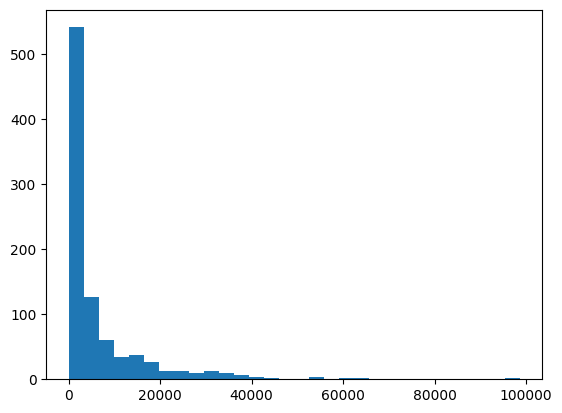

In [ ]:
plt.hist(flood['gfd_area'], bins=30)

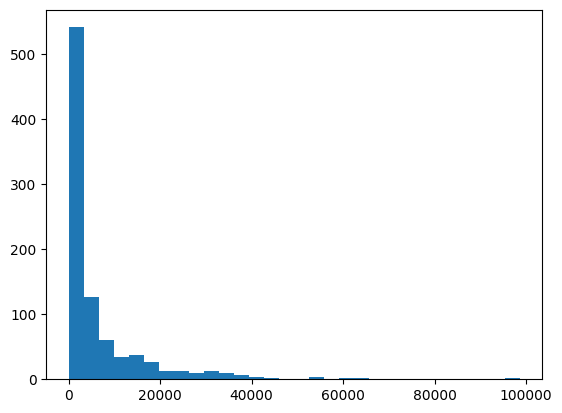

In [ ]:
outputhist = plt.hist(flood['gfd_area'], bins=30)

In [ ]:
outputhist

(array([541., 126.,  61.,  35.,  38.,  26.,  12.,  13.,  10.,  12.,   9.,
          7.,   4.,   2.,   0.,   1.,   4.,   1.,   2.,   2.,   0.,   1.,
          1.,   1.,   1.,   0.,   0.,   1.,   0.,   2.]),
 array([    0.        ,  3284.92066667,  6569.84133333,  9854.762     ,
        13139.68266667, 16424.60333333, 19709.524     , 22994.44466667,
        26279.36533333, 29564.286     , 32849.20666667, 36134.12733333,
        39419.048     , 42703.96866667, 45988.88933333, 49273.81      ,
        52558.73066667, 55843.65133333, 59128.572     , 62413.49266667,
        65698.41333333, 68983.334     , 72268.25466667, 75553.17533333,
        78838.096     , 82123.01666667, 85407.93733333, 88692.858     ,
        91977.77866667, 95262.69933333, 98547.62      ]),
 <BarContainer object of 30 artists>)

In [ ]:
def put_values_into_bins(value,bin_edges):
    for i in range(len(bin_edges)-1):
        if value >= bin_edges[i] and value < bin_edges[i+1]:
          new_val = bin_edges[i] + (bin_edges[i+1]-bin_edges[i])/2
          return new_val
    return None

In [ ]:
put_values_into_bins(1000,outputhist[1])

np.float64(1642.4603333333332)

In [ ]:
flood['gdf_area_bin'] = flood['gfd_area'].apply(lambda x:put_values_into_bins(x,outputhist[1]))

(array([541., 126.,  61.,  35.,  38.,  26.,  12.,  13.,  10.,  12.,   9.,
          7.,   4.,   2.,   0.,   1.,   4.,   1.,   2.,   2.,   0.,   1.,
          1.,   1.,   1.,   0.,   0.,   1.,   0.,   1.]),
 array([ 1642.46033333,  4817.88364444,  7993.30695556, 11168.73026667,
        14344.15357778, 17519.57688889, 20695.0002    , 23870.42351111,
        27045.84682222, 30221.27013333, 33396.69344444, 36572.11675556,
        39747.54006667, 42922.96337778, 46098.38668889, 49273.81      ,
        52449.23331111, 55624.65662222, 58800.07993333, 61975.50324444,
        65150.92655556, 68326.34986667, 71501.77317778, 74677.19648889,
        77852.6198    , 81028.04311111, 84203.46642222, 87378.88973333,
        90554.31304444, 93729.73635556, 96905.15966667]),
 <BarContainer object of 30 artists>)

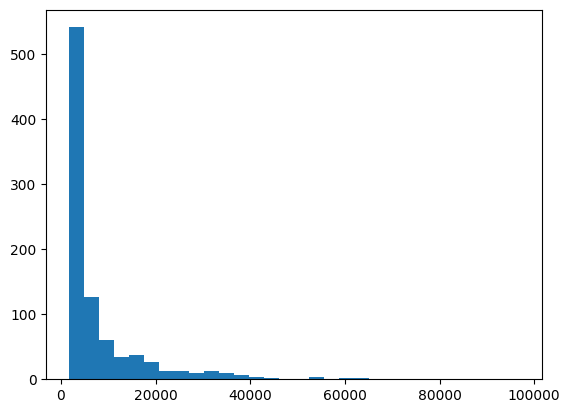

In [ ]:
plt.hist(flood['gdf_area_bin'], bins=30)

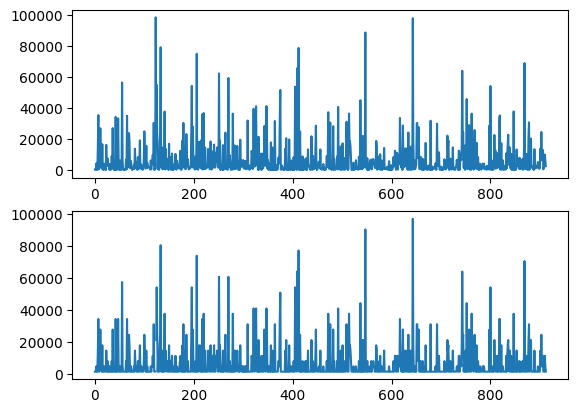

In [ ]:
plt.subplot(2,1,1)
plt.plot(flood['gfd_area'])
plt.subplot(2,1,2)
plt.plot(flood['gdf_area_bin'])

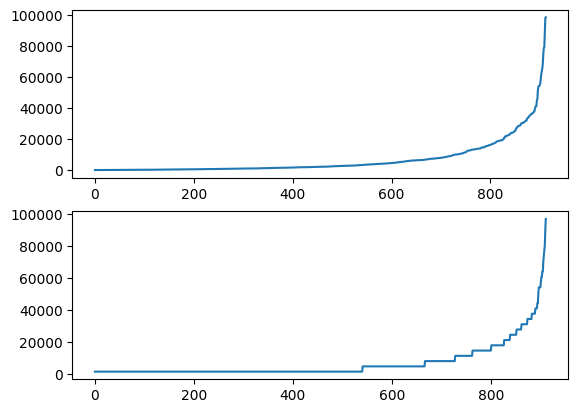

In [ ]:
plt.subplot(2,1,1)
plt.plot(flood['gfd_area'].sort_values().reset_index(drop=True))
plt.subplot(2,1,2)
plt.plot(flood['gdf_area_bin'].sort_values().reset_index(drop=True))

### Outlier Removal

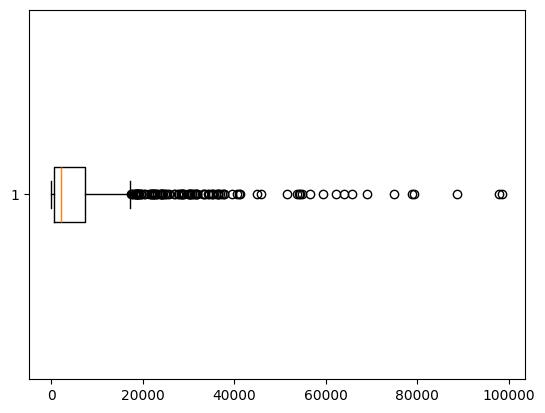

In [ ]:
plt.boxplot(flood['gfd_area'],vert=False);

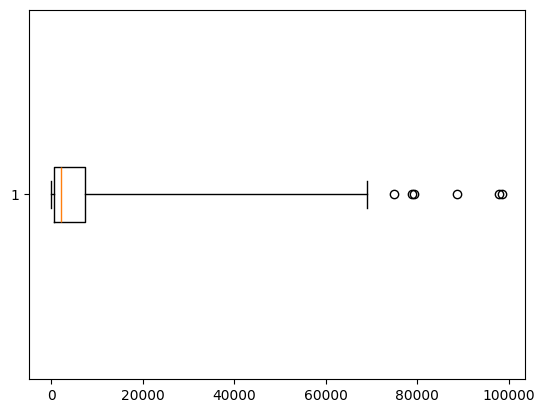

In [ ]:
outputbox = plt.boxplot(flood['gfd_area'],vert=False,whis=10)

In [ ]:
outputbox

{'whiskers': [<matplotlib.lines.Line2D at 0x79015685a0f0>,
 'caps': [<matplotlib.lines.Line2D at 0x79015685a9f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x790156859ee0>],
 'medians': [<matplotlib.lines.Line2D at 0x790156858da0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7901568593d0>],
 'means': []}

In [ ]:
outputbox['whiskers'][0].get_xdata()

array([608.6,   0. ])

In [ ]:
outputbox['whiskers'][1].get_xdata()

array([ 7354.55, 68991.93])

In [ ]:
outputbox['whiskers'][1].get_xdata()[1]

np.float64(68991.93)

In [ ]:
outputbox['fliers'][0].get_xdata()

array([98547.62, 79213.43, 75030.8 , 78785.53, 88773.57, 97982.77])

remove outliers

In [ ]:
flood_nooutlier = flood[flood['gfd_area']<
                        outputbox['whiskers'][1].get_xdata()[1]]

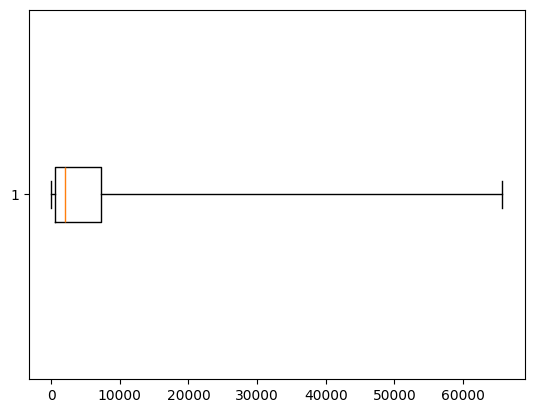

In [ ]:
outputbox2 = plt.boxplot(flood_nooutlier['gfd_area'],vert=False,whis=10)

ตามหาค่า outlier

In [ ]:
flood[flood['gfd_area'] == outputbox['fliers'][0].get_xdata()[0]]

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000,gdf_area_new,gdf_area_bin
123,DFO_2208_From_20030416_to_20030528,2208,std,0,Russia,0,64.739289,55.453563,4/16/03,5/28/03,...,98547.62,1014245.0,1014245.0,931108,1,0,83137,1.0,NaN,NaN


#Data Integration

In [ ]:
project_df = pd.read_csv('/content/drive/MyDrive/datamining/Copy of opendata_project-2.csv')
project_df.head()

,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project,day
0,20809.0,5ec3409884c1860019f3298d,Baan Laksiri Surin-Korco,บ้านหลักศิริ สุรินทร์-คอโค,3,Townhome,ทาวน์โฮม,1490000.0,developer_7326,"LAK SIRI REAL ESTATE CO., LTD.",...,NaN,NaN,1.0,1.0,2020-05-19 09:12:40,NaN,2020-12-04 10:33:10,baania,https://baania.com/th/project/บ้านหลักศิริ-สุร...,2023-06-11
1,4268.0,project_15905,Liberty Park 2,ลิเบอร์ตี้ พาร์ค 2,2,Condo,คอนโด,6500000.0,developer_10510,NaN,...,0.0,0.0,1.0,1.0,2019-06-28 16:06:45,1998-12-31 07:00:00,2020-12-04 10:39:27,baania,https://baania.com/th/project/ลิเบอร์ตี้-พาร์ค...,2023-06-11
2,5849.0,62b2b082cb0d2c0014be01a6,Pleno Paholyothin-Saimai 2,พลีโน่ พหลโยธิน-สายไหม 2,3,Townhome,ทาวน์โฮม,2790000.0,developer_1760,"AP (THAILAND) PUB CO., LTD.",...,1.0,NaN,1.0,1.0,2022-06-22 13:02:42,2024-01-01 07:00:00,2023-03-20 15:00:04,baania,https://baania.com/th/project/พลีโน่-พหลโยธิน-...,2023-06-11
3,21762.0,project_6010,Baan Thara Rin,บ้านธารารินทร์,1,Detached House,บ้าน,3100000.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,2017-04-19 14:41:10,NaN,2022-11-07 12:30:02,baania,https://baania.com/th/project/บ้านธารารินทร์-p...,2023-06-11
4,10751.0,project_11312,The Forest Hill,เดอะ ฟอเรสต์ ฮิลล์,1,Detached House,บ้าน,2450000.0,developer_7313,"Cholsiri Property Co., Ltd.",...,1.0,NaN,1.0,1.0,2017-10-30 14:10:50,2018-12-31 07:00:00,2022-08-15 16:00:05,baania,https://baania.com/th/project/เดอะ-ฟอเรสต์-ฮิล...,2023-06-11


In [ ]:
for i in project_df.columns:
    print(i)

row_number
project_id
name_en
name_th
propertytype_id
propertytype_name_en
propertytype_name_th
price_min
developer_id
developer_name_en
developer_name_th
latitude
longitude
neighborhood_id
neighborhood_name_en
neighborhood_name_th
subdistrict_id
subdistrict_name_en
subdistrict_name_th
district_id
district_name_en
district_name_th
province_id
province_name_en
province_name_th
zipcode
count_elevator
count_elevator_service
count_floor
count_parking
count_tower
count_unit
count_unittype
facility_clubhouse
facility_fitness
facility_meeting
facility_park
facility_playground
facility_pool
facility_security
date_created
date_finish
date_updated
source
url_project
day


In [ ]:
unit_df = pd.read_csv('/content/drive/MyDrive/datamining/Copy of opendata_unittype-2.csv')
unit_df.head()

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,count_room_kitchen,count_room_living,count_room_maid,count_room_storage,count_room_utility,date_created,date_updated,source,url_unittype,day
0,37586,unittype_35602,project_15270,Studio,2,Condo,คอนโด,NaN,30.0,3700000.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:22:56,2020-10-14 20:21:01,baania,https://baania.com/th/project/ไลฟ์-แอท-รัชดา-ส...,2023-06-11
1,9427,unittype_4487,project_1476,ภัทรสิน,3,Townhome,ทาวน์โฮม,NaN,NaN,2000000.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:20:17,2020-10-14 00:53:00,baania,https://baania.com/th/project/บ้านสวนทรัพย์ธาน...,2023-06-11
2,12994,unittype_37624,project_16674,Type B,3,Townhome,ทาวน์โฮม,24.0,96.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2022-09-09 15:30:02,2022-09-09 15:03:18,baania,https://baania.com/th/project/สกายไลน์-อมตะ-16...,2023-06-11
3,19073,62286afcc74d880014871357,622861f7aae18f00134066d6,ทาวน์โฮมสองชั้น,3,Townhome,ทาวน์โฮม,NaN,NaN,1000000.0,...,1.0,NaN,NaN,NaN,NaN,2022-03-09 16:30:04,2022-03-09 16:17:44,baania,https://baania.com/th/project/รุ่งเรืองทรัพย์ว...,2023-06-11
4,10907,unittype_8344,project_2821,2 Bedroom (ขายแล้ว),2,Condo,คอนโด,NaN,48.0,4200000.0,...,1.0,1.0,NaN,NaN,NaN,2021-11-12 13:24:53,2020-10-16 16:46:17,baania,https://baania.com/th/project/เดอะ-เทมโป-แกรนด...,2023-06-11


In [ ]:
for i in unit_df.columns:
    print(i)

row_number
unittype_id
project_id
name_th
propertytype_id
propertytype_name_en
propertytype_name_th
area_total_min_wa
area_usable_min
price_min
count_airconditioner
count_elevator
count_floor_internal
count_parking
count_room_bath
count_room_bed
count_room_dinning
count_room_guest
count_room_kitchen
count_room_living
count_room_maid
count_room_storage
count_room_utility
date_created
date_updated
source
url_unittype
day


## Add more columns to the table (X-Data Integration)

map()

,'developer_name_th',
                                                        'neighborhood_name_th','subdistrict_name_th',
                                                        'district_name_th','province_name_th'

In [ ]:
unit_df['project_id'].map(project_df.set_index('project_id')['name_th'])

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

##Deduplication

ดูก่อนว่า data มัน duplicate ยังไง

In [ ]:
project_df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
23862,False
23863,False
23864,False
23865,False


In [ ]:
project_df.duplicated().any()

np.True_

In [ ]:
project_df.duplicated().sum()

np.int64(2)

In [ ]:
project_df[project_df.duplicated(keep=False)]

,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project,day
138,NaN,ขนส่งปทุม,3611,BAN CHANG,บ้านฉาง,3600,MUEANG PATHUM THANI,เมืองปทุมธานี,3599,Pathum Thani,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5610,NaN,ขนส่งปทุม,3611,BAN CHANG,บ้านฉาง,3600,MUEANG PATHUM THANI,เมืองปทุมธานี,3599,Pathum Thani,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8103,NaN,ขนส่งปทุม,3656,BANG PHO NUEA,บางโพธิ์เหนือ,3647,SAM KHOK,สามโคก,3599,Pathum Thani,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10204,NaN,ขนส่งปทุม,3656,BANG PHO NUEA,บางโพธิ์เหนือ,3647,SAM KHOK,สามโคก,3599,Pathum Thani,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
project_df.duplicated(subset=['project_id'], keep=False).sum()

np.int64(6981)

In [ ]:
project_df[project_df.duplicated(subset=['project_id'], keep=False)].head(50)

,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project,day
0,20809.0,5ec3409884c1860019f3298d,Baan Laksiri Surin-Korco,บ้านหลักศิริ สุรินทร์-คอโค,3,Townhome,ทาวน์โฮม,1490000.0,developer_7326,"LAK SIRI REAL ESTATE CO., LTD.",...,NaN,NaN,1.0,1.0,2020-05-19 09:12:40,NaN,2020-12-04 10:33:10,baania,https://baania.com/th/project/บ้านหลักศิริ-สุร...,2023-06-11
8,3795.0,5f04029cb285eb00194de1dd,City park sakaeo,ซิตี้ปาร์ค สระแก้ว 2,4,Commercial,อาคารพาณิชย์,1900000.0,5f03f344b285eb00194de191,"Sa Kaeo Development Co., Ltd.",...,1.0,NaN,NaN,1.0,2020-07-07 12:05:32,2016-01-01 07:00:00,2020-12-04 10:33:25,baania,https://baania.com/th/project/ซิตี้ปาร์ค-สระแก...,2023-06-11
23,20554.0,project_7343,Baan Nantana Garden,บ้านนันทนาการ์เด้นท์,3,Townhome,ทาวน์โฮม,1490000.0,developer_10510,NaN,...,1.0,1.0,1.0,1.0,2017-05-22 11:28:57,NaN,2020-12-04 10:37:28,baania,https://baania.com/th/project/บ้านนันทนาการ์เด...,2023-06-11
24,12456.0,project_4054,Cubist Townhome Sanambinnam,คิวบิสทาวน์โฮม สนามบินน้ำ,3,Townhome,ทาวน์โฮม,3790000.0,developer_2417,"PLUS PROPERTY CO., LTD.",...,1.0,NaN,NaN,1.0,2017-02-23 13:40:12,NaN,2021-07-15 15:30:11,baania,https://baania.com/th/project/คิวบิสทาวน์โฮม-ส...,2023-06-11
34,5047.0,5f34e60ec801fb0019dacbd6,Taraville Pechabura,ธาราวิลล์เพชบุระ,3,Townhome,ทาวน์โฮม,1000000.0,5f34e256c801fb0019dacbbe,"Thanthong Property and Construction Co., Ltd.",...,NaN,NaN,NaN,1.0,2020-08-13 14:04:46,NaN,2022-08-04 15:00:08,baania,https://baania.com/th/project/ธาราวิลล์เพชบุระ...,2023-06-11
38,8813.0,project_7554,Sanamjan Lakeview,สนามจันทร์ เลควิว,3,Townhome,ทาวน์โฮม,750000.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,2017-05-30 15:53:44,NaN,2020-12-04 10:37:42,baania,https://baania.com/th/project/สนามจันทร์-เลควิ...,2023-06-11
40,8566.0,project_8784,Nara Cluster Romklao-Suvarnabhumi,นารา คลัสเตอร์ ร่มเกล้า-สุวรรณภูมิ,4,Commercial,อาคารพาณิชย์,3990000.0,developer_5776,NaN,...,1.0,1.0,NaN,1.0,2017-07-12 14:24:29,2019-01-01 07:00:00,2021-06-30 11:30:04,baania,https://baania.com/th/project/นารา-คลัสเตอร์-ร...,2023-06-11
41,2361.0,project_13214,Phuket Villa Kathu,ภูเก็ต วิลล่า กะทู้,20000,Twin house,บ้านแฝด,2463200.0,developer_8436,"Phuket Villa Co.,Ltd.",...,NaN,1.0,1.0,1.0,2018-05-10 14:27:40,2013-12-31 07:00:00,2020-12-04 10:44:55,baania,https://baania.com/th/project/ภูเก็ต-วิลล่า-กะ...,2023-06-11
43,19726.0,project_3669,Roi Pruksa Kampangsan,ร้อยพฤกษา กำแพงแสน,20000,Twin house,บ้านแฝด,1990000.0,developer_2256,"MIDA PROPERTY CO., LTD.",...,1.0,NaN,1.0,1.0,2017-01-30 11:06:01,NaN,2023-05-18 09:30:02,baania,https://baania.com/th/project/ร้อยพฤกษา-กำแพงแ...,2023-06-11
44,652.0,project_15487,We Village,วี วิลเลจ,3,Townhome,ทาวน์โฮม,2220000.0,developer_6334,NaN,...,NaN,NaN,NaN,NaN,2019-05-23 14:00:34,2018-01-01 07:00:00,2022-06-21 19:00:06,baania,https://baania.com/th/project/วี-วิลเลจ-projec...,2023-06-11


ลบข้อมูลที่มี project_id ซ้ำกัน
โดยเก็บไว้เฉพาะตัวที่เป็นข้อมูล่าสุด(ตัวล่าง)

In [ ]:
project_df_dedup = project_df.drop_duplicates(subset=['project_id'], keep='last')

map data ที่ไม่มี duplicated index

In [ ]:
unit_df['project_id'].map(project_df_dedup.set_index('project_id')['name_th'])

,project_id
0,ไลฟ์ แอท รัชดา - สุทธิสาร
1,บ้านสวนทรัพย์ธานี
2,สกายไลน์ อมตะ
3,รุ่งเรืองทรัพย์วิลเลจ @ กะปาง
4,เดอะ เทมโป แกรนด์ สาทร-วุฒากาศ
...,...
43369,บ้านคุรุสภา นครราชสีมา
43370,บ้านเต็มสิริ 1
43371,พระเงิน เพลส
43372,บ้านไทยวิลล่า ศรีราชา


In [ ]:
unit_df['ชื่อโครงการ'] = unit_df['project_id'].map(project_df_dedup.set_index('project_id')['name_th'])

# HW3 กลับไปเติมข้อมูล Columns ที่จำเป็นที่เหลือ
('developer_name_th', 'neighborhood_name_th','subdistrict_name_th', 'district_name_th','province_name_th')

In [ ]:
# developer_name_th
unit_df['developer_name_th'] = unit_df['project_id'].map(
    project_df_dedup.set_index('project_id')['developer_name_th']
)

# neighborhood_name_th
unit_df['neighborhood_name_th'] = unit_df['project_id'].map(
    project_df_dedup.set_index('project_id')['neighborhood_name_th']
)

# subdistrict_name_th
unit_df['subdistrict_name_th'] = unit_df['project_id'].map(
    project_df_dedup.set_index('project_id')['subdistrict_name_th']
)

# district_name_th
unit_df['district_name_th'] = unit_df['project_id'].map(
    project_df_dedup.set_index('project_id')['district_name_th']
)

# province_name_th
unit_df['province_name_th'] = unit_df['project_id'].map(
    project_df_dedup.set_index('project_id')['province_name_th']
)

In [ ]:
unit_df.head()

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,date_updated,source,url_unittype,day,ชื่อโครงการ,developer_name_th,neighborhood_name_th,subdistrict_name_th,district_name_th,province_name_th
0,37586,unittype_35602,project_15270,Studio,2,Condo,คอนโด,NaN,30.0,3700000.0,...,2020-10-14 20:21:01,baania,https://baania.com/th/project/ไลฟ์-แอท-รัชดา-ส...,2023-06-11,ไลฟ์ แอท รัชดา - สุทธิสาร,บริษัท เอพี (ไทยแลนด์) จำกัด (มหาชน),สุทธิสาร,สามเสนนอก,ห้วยขวาง,กรุงเทพมหานคร
1,9427,unittype_4487,project_1476,ภัทรสิน,3,Townhome,ทาวน์โฮม,NaN,NaN,2000000.0,...,2020-10-14 00:53:00,baania,https://baania.com/th/project/บ้านสวนทรัพย์ธาน...,2023-06-11,บ้านสวนทรัพย์ธานี,บริษัท เอส.พี.เอ็น.แลนด์ จำกัด,คลองส่งน้ำ1,ปรุใหญ่,เมืองนครราชสีมา,นครราชสีมา
2,12994,unittype_37624,project_16674,Type B,3,Townhome,ทาวน์โฮม,24.0,96.0,NaN,...,2022-09-09 15:03:18,baania,https://baania.com/th/project/สกายไลน์-อมตะ-16...,2023-06-11,สกายไลน์ อมตะ,บริษัท เจเคเอส ฟิวเจอร์ จำกัด,อมตะซิตี้ระยอง,มาบยางพร,ปลวกแดง,ระยอง
3,19073,62286afcc74d880014871357,622861f7aae18f00134066d6,ทาวน์โฮมสองชั้น,3,Townhome,ทาวน์โฮม,NaN,NaN,1000000.0,...,2022-03-09 16:17:44,baania,https://baania.com/th/project/รุ่งเรืองทรัพย์ว...,2023-06-11,รุ่งเรืองทรัพย์วิลเลจ @ กะปาง,บริษัท รุ่งเรืองทรัพย์ พร็อพเพอร์ตี้ จำกัด,NaN,กะปาง,ทุ่งสง,นครศรีธรรมราช
4,10907,unittype_8344,project_2821,2 Bedroom (ขายแล้ว),2,Condo,คอนโด,NaN,48.0,4200000.0,...,2020-10-16 16:46:17,baania,https://baania.com/th/project/เดอะ-เทมโป-แกรนด...,2023-06-11,เดอะ เทมโป แกรนด์ สาทร-วุฒากาศ,บริษัท บิลท์ แลนด์ จำกัด (มหาชน),วุฒากาศ,บางค้อ,จอมทอง,กรุงเทพมหานคร


##Data Transformation

##Colum Alignment

##Add Data Source Column